In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Cleaning Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum().sort_values()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df=df.drop_duplicates()

In [6]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
11


In [7]:
df['BloodPressure']=df.BloodPressure.replace(0,df.BloodPressure.mean())
df['Glucose']=df.Glucose.replace(0,df.Glucose.mean())
df['SkinThickness']=df.SkinThickness.replace(0,df.SkinThickness.mean())
df['BMI']=df.BMI.replace(0,df.BMI.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1


**Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


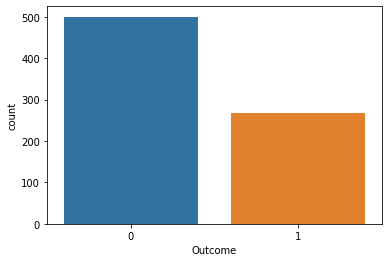

In [8]:
sn.countplot('Outcome',data=df)

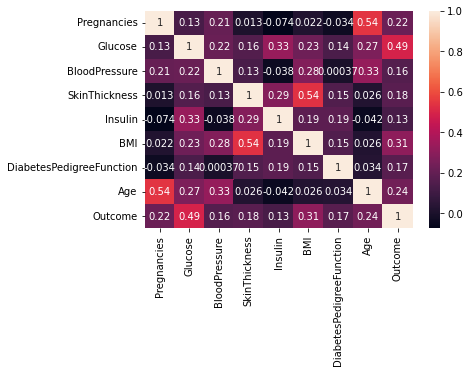

In [9]:
corrmat=df.corr()
sn.heatmap(corrmat, annot=True)

Dropping all the columns which less related to the output feature.

In [10]:
df=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')
df.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35.000000,33.6,50,1
1,1,85.0,29.000000,26.6,31,0
2,8,183.0,20.536458,23.3,32,1
3,1,89.0,23.000000,28.1,21,0
4,0,137.0,35.000000,43.1,33,1


Looking for outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

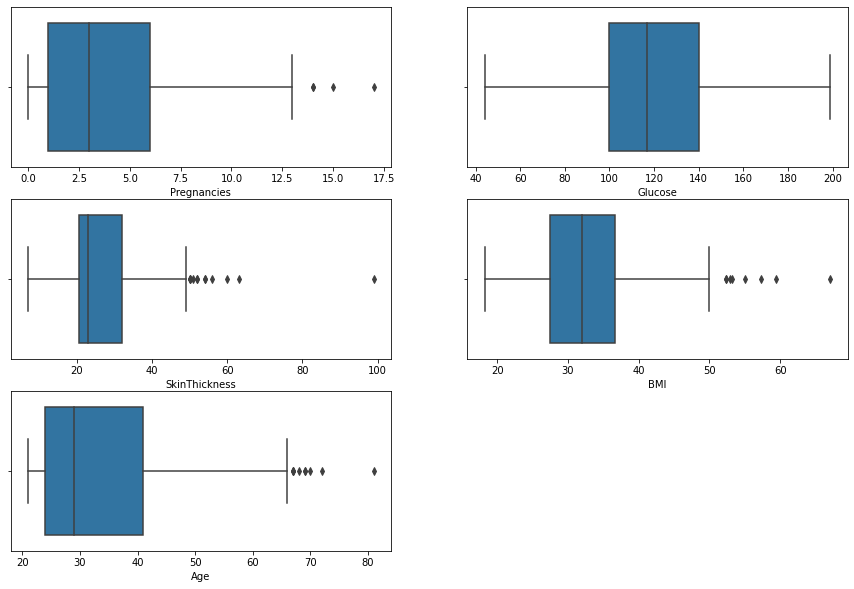

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sn.boxplot('Pregnancies',data=df)
plt.subplot(3,2,2)
sn.boxplot('Glucose',data=df)
plt.subplot(3,2,3)
sn.boxplot('SkinThickness',data=df)
plt.subplot(3,2,4)
sn.boxplot('BMI',data=df)
plt.subplot(3,2,5)
sn.boxplot('Age',data=df)
plt.show()

**Using Logistic Regression Model and Standard Scaler in Pipe:**
Using standard Scaler for scaling the data as there are outliers.

In [12]:
from os import pipe
x=df.drop('Outcome',axis=1).values
y=df.Outcome
steps={('Standard Scaler',StandardScaler()),
    ('Logistic Regression',LogisticRegression())}
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y)
pipeline=Pipeline(steps)
pipeline.fit(xtrain,ytrain)
pred=pipeline.predict(xtest)
pipeline.score(xtest,ytest)



0.7748917748917749

**ROC CURVE**

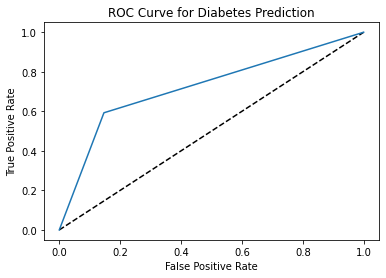

In [27]:
fpr,tpr,threshold=roc_curve(ytest,pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

**Area Under ROC Curve**

In [31]:
roc_auc_score(ytest,pred)

0.7196296296296296